## Breast cancer data analysis:  collinearity and dimensional reduction

Data source: Kaggle (https://www.kaggle.com/uciml/breast-cancer-wisconsin-data).
Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number 
2) Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter) b) texture (standard deviation of gray-scale values) c) perimeter d) area e) smoothness (local variation in radius lengths) f) compactness (perimeter^2 / area - 1.0) g) concavity (severity of concave portions of the contour) h) concave points (number of concave portions of the contour) i) symmetry j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. 
* In this blog, analyses of collinearity and dimensional reduction are discussed.


In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
# First, we import the downloaded cvs data 
bc=pd.read_csv("C:\data science\project1\BC.csv")
bc.head(10)     
#print(bc.describe())
print(np.count_nonzero(bc.diagnosis[]))

569


In [4]:
# slicing out the predictor variables/features
X=bc.iloc[:,2:32]
print(type(X))
# displaying the first five rows of X
X.head()

<class 'pandas.core.frame.DataFrame'>


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
# response variable: 'diagnosis'
yr=bc.diagnosis
print(type(yr))
yr.head()
# we use pandas get_dummies function to convert the qualitative values in yr to quantitative 
yd=pd.get_dummies(yr) # this creates two columns: one for B and another for M
print(yd.head())
# take the yd.M as the response variable (y) since it assigns 1 for M and 0 for B
# this makes sense as we are interested more in predicting M cases than B
y=yd.M 
y.head()

<class 'pandas.core.series.Series'>
   B  M
0  0  1
1  0  1
2  0  1
3  0  1
4  0  1


0    1
1    1
2    1
3    1
4    1
Name: M, dtype: uint8

### 1.  Identifying Collinearity
* Now, looking at the covariance matrix of the features, we can identify variables with more than 85% correlation 
(85% selected as a threshold here, but other values can be used as well)

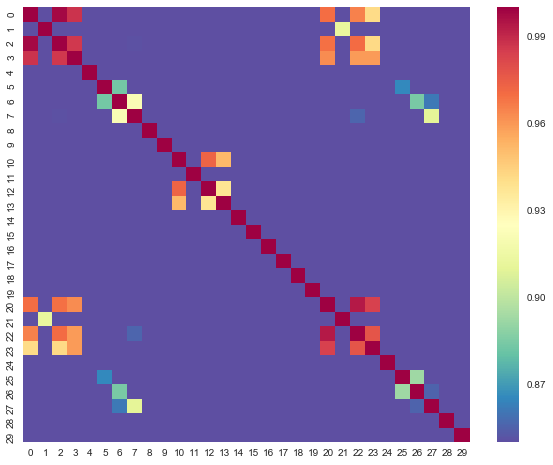

In [209]:
cor=np.corrcoef(X.T)
type(cor)
%matplotlib inline
plt.figure(figsize=(10, 8))
sns.heatmap(cor, vmin=0.85,vmax=1,\
            cmap=plt.cm.Spectral_r)
#cmap='coolwarm'#

*From the above plot, we can see the following features are highly correlated:*
* feature 0,2,3, 20, 22, 23 (radius, area, perimeter),this makes sense since area and perimeter are computed from radius. We keep 0 (mean radius) and 20 (worst radius), and discard the rest.
* feature 10, 12, 13 are  highly correlated to eachother. Keeping feature 10, we can leave the rest out. 

**Summary:**
* covariance matrix can only detect one-to-one collinearity leaving the issue of multi-collinearity
* High multi-collinearity can be detected by inspecting the eigen values of correlation matrix. A very low eigen value shows that the data are collinear, and the corresponding eigen vector shows which variables are collinear.
* If there is no collinearity in the data, you would expect that none of the eigen values are close to zero

### 2. Dimensional reduction using Principal Component Analysis (PCA)

* PCA is a technique that extracts a smaller but valuable set of predictors by linear combination of the original *p* predictors (x1,x2,x3,...,xp) in a dataset. The new set of predictors captures as much information as possible usually 95% or more of the variance in the original data.  
* The new predictors can be written as: 
    * PC1 = Φ¹¹X¹ + Φ²¹X² + Φ³¹X³ + .... +Φp¹Xp
    * PC2 = Φ¹²X¹ + Φ²²X² + Φ³²X³ + .... + Φp2Xp
    ...
    * Φp¹, and Φp2 are the loading vectors of the first and the second  principal components,respectively. 
* In this blog, we apply PCA to the original data, and differnet versions of it and try to understand how results from PCA vary.
** Data to be used: raw/original data, scaled or standardized data, and scaled data with the removal of collinear predictors.

#### 2.1. PCA on original data


In [184]:
from sklearn.decomposition import PCA
pca=PCA(n_components=10)
x_pca=pca.fit_transform(X)
print (x_pca.shape)
print(pca.explained_variance_ratio_) 
print (pca.explained_variance_ratio_.sum())
loadings = pca.components_

(569, 10)
[  9.82044672e-01   1.61764899e-02   1.55751075e-03   1.20931964e-04
   8.82724536e-05   6.64883951e-06   4.01713682e-06   8.22017197e-07
   3.44135279e-07   1.86018721e-07]
0.999999894684


* The above result shows more than 95% of the variance in the data can be expressed just by the first component. This happens in cases where there is high collinearity; the presence of collinearity can cause the PCA to overemphasize the contribution of the variance from the highly correlated (or redundant) varibles and gives less weight to the variables to the uncorrelated variables. This ultimately influence modeling/prediction results if such data is used. 

* It is also important to note that **we used PCA on unscaled data**. When the data is not scaled, PCA might  give us a result where only one component explains almost all the variance in the data.  

#### 2.2. PCA on scaled/standardized data
* Standardizing transforms the data to a data with zero mean and a standard deviation of one (unit variance).
* In cases where the original predictors may have different scales, it is obvious the resulting variances in these predictors will be large. Therefore, performing PCA on unstandardized predictors will result a biased result; PCA assigns large loadings on the predictors with high variances.

In [186]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled=scaler.fit_transform(X)

In [187]:
pca=PCA(n_components=0.95)
x_pca=pca.fit_transform(X_scaled)
print (x_pca.shape)
print(pca.explained_variance_ratio_) 
print (pca.explained_variance_ratio_.sum())
loadings = pca.components_

(569, 10)
[ 0.44272026  0.18971182  0.09393163  0.06602135  0.05495768  0.04024522
  0.02250734  0.01588724  0.01389649  0.01168978]
0.951568814337


#### 2.3. PCA after removing collinear variables
* Here, PCA is applied on the saled data after removing some of the collinear features as identified in section 1.  We aim to see how removing redundant/colinear variables can improve PCA results.

In [193]:
# Remove area, perimeter,perimeter_worst, area_worst, perimeter_se, area_se  ( columns: 2,3,12,13,22,23,) from the original data: 
X_scaled=pd.DataFrame(X_scaled)
xx=X_scaled.drop(X_scaled.columns[[2, 3, 22, 23, 12, 13]], axis=1) 
pca=PCA(n_components=0.95)
x_pca=pca.fit_transform(xx)
print (x_pca.shape)
print(pca.explained_variance_ratio_) 
print (pca.explained_variance_ratio_.sum())
loadings = pca.components_

(569, 11)
[ 0.42661046  0.15932139  0.10294428  0.07788731  0.06489774  0.05015242
  0.02145044  0.0187846   0.01505759  0.01197751  0.01117206]
0.960255820189


##### Variance plots

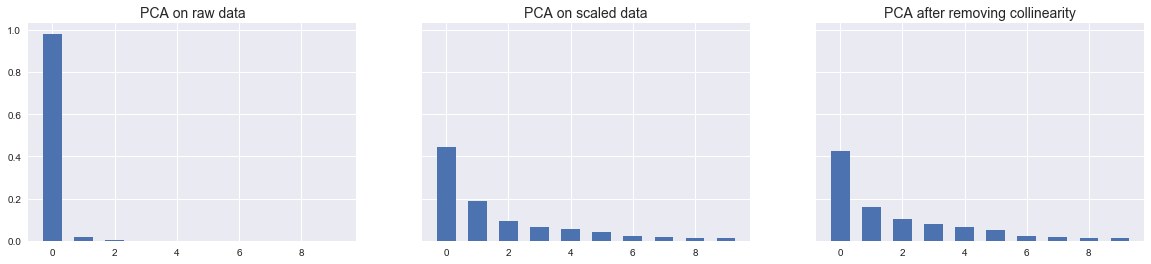

In [190]:
import matplotlib.pyplot as plt

n=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10']
index = np.arange (10)

var_1=np.array([9.82044672e-01,1.61764899e-02,1.55751075e-03,1.20931964e-04,8.82724536e-05,6.64883951e-06,4.01713682e-06,8.22017197e-07,3.44135279e-07,1.86018721e-07])                
var_sc=np.array([0.44272026,0.18971182,0.09393163,0.06602135,0.05495768,0.04024522,0.02250734,0.01588724,0.01389649,0.01168978])
var_sc_coll=np.array([0.42661046,0.15932139,0.10294428,0.07788731,0.06489774,0.05015242,0.02145044,0.0187846,0.01505759,0.01197751])
var=np.vstack([var_1,var_sc,var_sc_coll]).T

# creating pandas datframe from numpy array 'var'
df=pd.DataFrame(var,index=n,columns=['original','scaled','scaled_no_colli'])

# plotting variance data 
%matplotlib inline
fig, ax= plt.subplots(1,3,sharey=True,figsize=(20,4))
r1 = ax[0].bar(index,df['original'],width = 0.6,align='center')
ax[0].set_title('PCA on raw data',fontsize=14)

r2 = ax[1].bar(index,df['scaled'],width = 0.6,align='center')
ax[1].set_title('PCA on scaled data',fontsize=14)

r3 = ax[2].bar(index,df['scaled_no_colli'],width= 0.6,align='center')
#ax[2].set_xticklabels(n)
ax[2].set_title('PCA after removing collinearity',fontsize=14)

**Summary:**

* By stanrdizing the data, PCA performance has improved quite well in capturing variance of the raw data
* Removing collinear features allowed the variance from other variables which were previously ignored to be captured by PCA. 

#### Ploting first and second principal components against diagnosis
* First principal component (PC1) is a linear combination of the features/variables which represents the maximum variance in the data set. 
* Second principal component (PC2) is also a linear combination of the features/variables which represents the remaining variance in the data set and is uncorrelated with the first principal component (PC1).

In [201]:
import pandas as pd
n=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11']
xx_pca=pd.DataFrame(x_pca,columns = n, index=bc.diagnosis)
xx_pca.head(3)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
diagnosis,,,,,,,,,,,
M,8.066802,0.414765,-2.538073,-2.608014,-1.344494,1.435172,-1.713811,-0.491329,0.655096,0.544224,0.718321
M,0.106798,-2.761727,-0.141345,-1.395074,0.130814,0.017362,-0.333451,-0.389474,-0.706687,0.114084,0.405121
M,4.386099,-1.969883,-0.226679,-1.108399,-0.700594,0.477506,0.287285,-0.079434,-0.352640,-0.654396,-0.284427


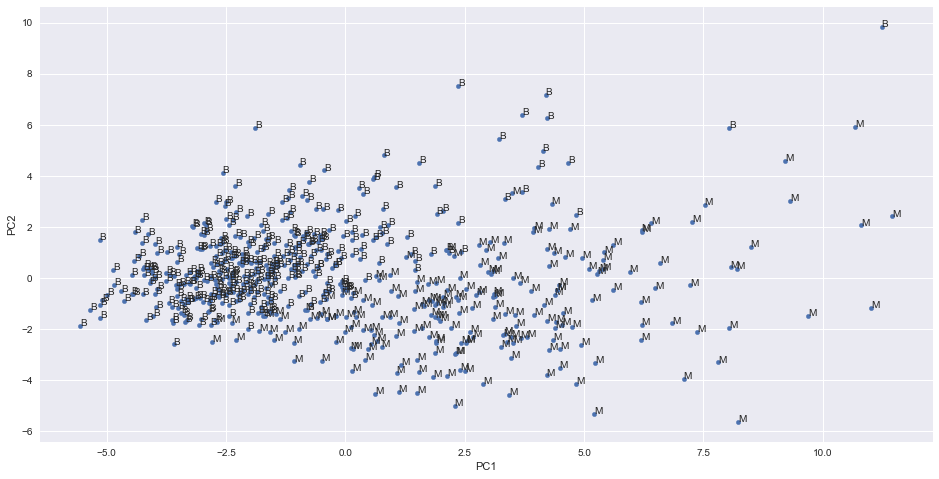

In [202]:
#plotting the first 2 pca compenents vs diagnosis
%matplotlib inline
ax = xx_pca.plot(kind='scatter', x='PC1', y='PC2', figsize=(16,8))
for i, diagnosis in enumerate(xx_pca.index):
    ax.annotate(diagnosis,(xx_pca.iloc[i].PC1, xx_pca.iloc[i].PC2))


**Summary:**

* PCA resulted clear regions of benine and malignant cases (as the above plot shows). This helps the modeling/prediction be more effective and accurate.
* After this, a model can be fitted on this data.